# 1.正規分布

## 1.1 確率の基礎

### 1.1.1確率変数と確率分布

- 確率変数：取り得る値が確率的に決まる変数
- 確率分布：起こり得るすべての値に対して，その確率が示されたもの

- 観測値，観測データ：確率分布から実際に得られた値
- サンプル，標本：観測値の集合

##### 🎲 サイコロの確率分布（一様分布）


|               | 1     | 2     | 3     | 4     | 5     | 6     |
|---------------|-------|-------|-------|-------|-------|-------|
| 確率 p(x)      | 1/6   | 1/6   | 1/6   | 1/6   | 1/6   | 1/6   |


#### 確率分布の満たす条件

  1. 各値の発生する確率はすべて０以上１以下
  
  $$
  0 \leq p(x_k) \leq 1 (k=1,2,...,N)
  $$

2. すべての確率の和は１
$$
\sum_{k=1}^{N} p(x_k) = 1
$$

### 1.1.2 確率分布の種類

- 離散型確率分布：離散値のみ取る　$p(x)$は**確率**を表す
- 連続型確率分布：連続値を取れる　$p(x)$は**確率密度**を表す

#### 確率分布の満たす条件(連続型)

  1. (すべての$x$において)確率密度は0以上
  
  $$
    p(x) \geq 0
  $$

2. 全区間における確率密度の積分は1
  $$
  \int_{-\infty}^{\infty} p(x)\, dx = 1
  $$

### 1.1.3 期待値と分散

#### 期待値 $\mu = \mathbb{E}[x] $
- 離散

$$
\mathbb{E}[x] = \sum_{k=1}^{N} x_k \cdot p(x_k)
$$

- 連続
$$
\mathbb{E}[x] = \int_{-\infty}^{\infty} x p(x) \, dx
$$

#### 分散 $\sigma^2 = \mathrm{Var}(x) = \mathbb{E}[(x-\mu)^2]$

- 離散

$$
\mathrm{Var}(x) = \sum_{k=1}^{N} (x_k - \mu)^2 \cdot p(x_k)
$$

- 連続

$$
\mathrm{Var}(x) = \int_{-\infty}^{\infty} (x - \mu)^2 \cdot p(x) \, dx
$$


標準偏差$\sigma$:分散の平方根

## 1.2 正規分布（ガウス分布）

### 1.2.1 正規分布の確率密度関数

$$
p(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

  - $ \mu $：平均（mean）
  - $ \sigma^2 $：分散（variance）
  - $ \sigma $：標準偏差（standard deviation）
  - $ \exp(\cdot) $：自然指数関数（底 $ e \approx 2.718 $）

正規分布　Normal Distributuion
$$
\mathcal{N}(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

### 1.2.2 正規分布のコード

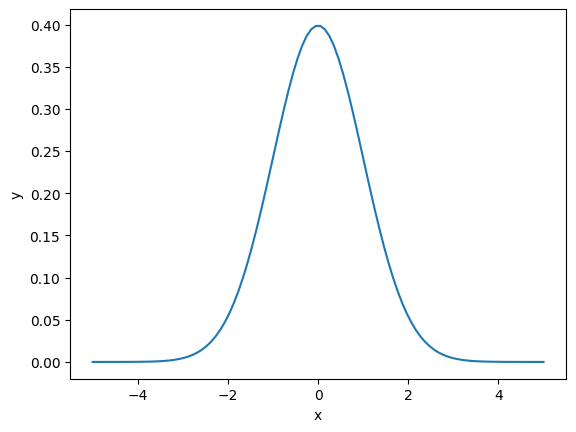

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

x = np.linspace(-5, 5, 100)
y = normal(x)


# plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1.2.3 パラメータの役割

正規分布のパラメータ

- 平均 $\mu$
- 標準偏差 $\sigma$

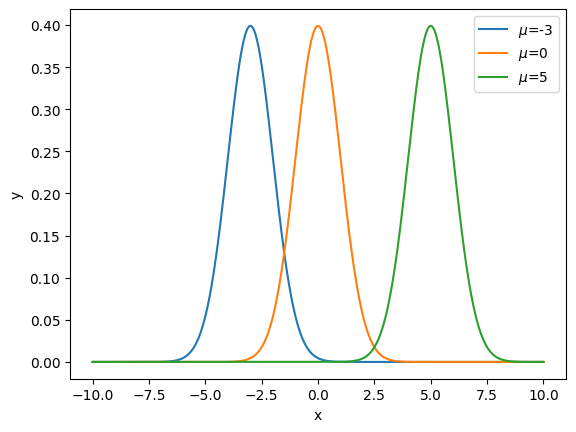

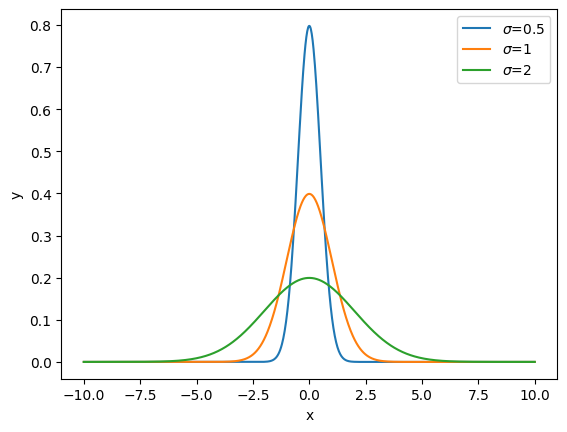

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

x = np.linspace(-10, 10, 1000)

# mu ====================
y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label=r'$\mu$=-3')
plt.plot(x, y1, label=r'$\mu$=0')
plt.plot(x, y2, label=r'$\mu$=5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# sigma ====================
y0 = normal(x, mu=0, sigma=0.5)
y1 = normal(x, mu=0, sigma=1)
y2 = normal(x, mu=0, sigma=2)

plt.plot(x, y0, label=r'$\sigma$=0.5')
plt.plot(x, y1, label=r'$\sigma$=1')
plt.plot(x, y2, label=r'$\sigma$=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.3 中心極限定理

### 1.3.1 中心極限定理とは

中心極限定理とは、**独立同分布（i.i.d.）な確率変数の和（または平均）**が、サンプル数が十分に大きくなると、元の分布の形状にかかわらず **正規分布に近づく** という定理

$$
\bar{x} = \dfrac{x^{(1)}+x^{(2)}+\cdots+x^{(N)}}{N}
$$

### 1.3.2 中心極限定理の実験

In [14]:
N = 3

xs = []
for n in range(N):
    x = np.random.rand() # 一様分布空の乱数
    xs.append(x)

x_mean = np.mean(xs)
print(x_mean)

0.5653313812479962


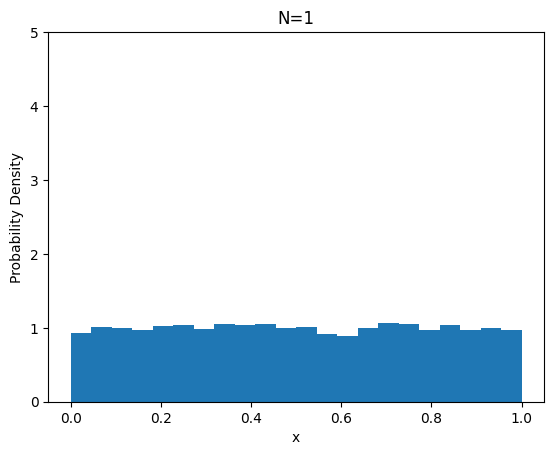

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_means = []
N = 1  # sample size

for _ in range(10000):
    xs = []
    for i in range(N):
        x = np.random.rand() #一様分布からサンプル
        xs.append(x)
    mean = np.mean(xs)
    x_means.append(mean)

# plot
plt.hist(x_means, bins='auto', density=True)
plt.title(f'N={N}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 5)
plt.show()

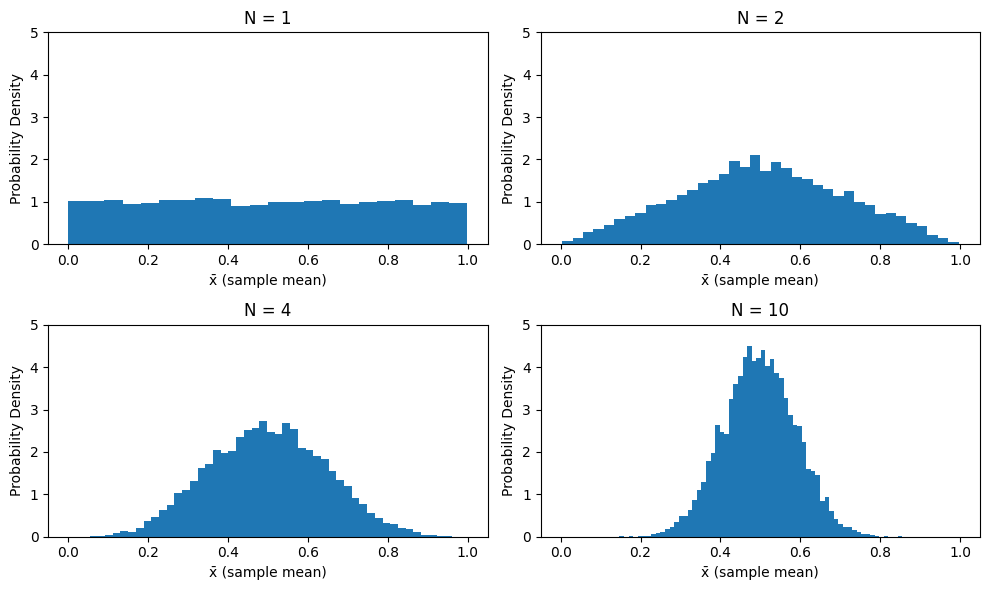

In [16]:

import numpy as np
import matplotlib.pyplot as plt

# サンプルサイズのリスト
N_values = [1, 2, 4, 10]

# グラフ用の設定
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2行2列, サイズ指定
axes = axes.flatten()  # 配列を1次元に展開してループ処理しやすく

for i, N in enumerate(N_values):
    x_means = []

    # 1万回サンプル平均を生成
    for _ in range(10000):
        xs = np.random.rand(N)  # 一様分布 [0, 1)
        mean = np.mean(xs)
        x_means.append(mean)

    # ヒストグラムを描画
    axes[i].hist(x_means, bins='auto', density=True)
    axes[i].set_title(f'N = {N}')
    axes[i].set_xlabel('x̄ (sample mean)')
    axes[i].set_ylabel('Probability Density')
    axes[i].set_xlim(-0.05, 1.05)
    axes[i].set_ylim(0, 5)

plt.tight_layout()
plt.show()


## 1.4 サンプル和の確率分布

サンプル和
$$
s  =x^{(1)}+x^{(2)}+\cdots+x^{(N)}
$$

### 1.4.1 サンプル和の期待値と分散

問：$\mathbb{E}[\bar{x}]=\mu,\mathrm{Var}[\bar{x}]=\frac{\sigma^2}{N}$のとき，$\mathbb{E}[N\bar{x}]，\mathrm{Var}[N\bar{x}]$を求めよ．
<!-- ホワイトボードで解く -->

### 1.4.2 コードで確かめる

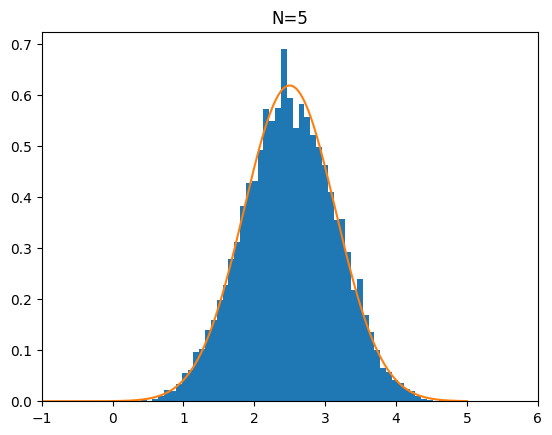

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_means = []
N = 5

for _ in range(10000):
    xs = []
    for i in range(N):
        x = np.random.rand()
        xs.append(x)
    mean = np.sum(xs)
    x_means.append(mean)

# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x_norm = np.linspace(-5, 5, 1000)
mu = 0.5 * N
sigma = np.sqrt(1 / 12 * N)
y_norm = normal(x_norm, mu, sigma)

# plot
plt.hist(x_means, bins='auto', density=True)
plt.plot(x_norm, y_norm)
plt.title(f'N={N}')
plt.xlim(-1, 6)
plt.show()

### 1.4.3 一様分布の平均と分散

ホワイトボード

## 1.5 身の回りにある正規分布

- 測定誤差
- 製品のサイズ
- 人の身長